In [1]:
import pandas as pd
import numpy as np
import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

### MLP를 two_moons 데이터셋에 적용
- 은닉유닛의 갯수는 따로 설정하지 않음, - 기본값 100개 

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [3]:
x,y = make_moons(n_samples=100,noise=0.25,random_state=3)

x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               stratify=y,
                                              random_state=42)
#데이터 수집,분할

In [4]:
#모델 선정,학습
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(x_train,y_train)

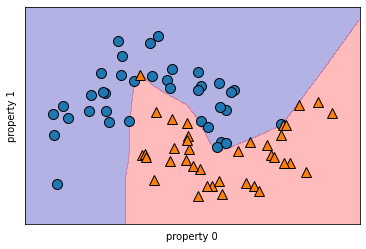

In [5]:
mglearn.plots.plot_2d_separator(mlp,x_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')
plt.show()

In [6]:
# 은닉 유닛의 수 10개로 감소시켜주기
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=[10], random_state=0, solver='lbfgs')

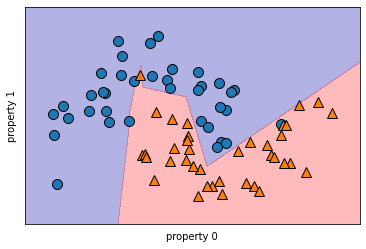

In [7]:
mglearn.plots.plot_2d_separator(mlp,x_train,fill=True,alpha=.3)
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')
plt.show()

이 데이터 셋에서 유닛의 개수를 줄여도 여전히 좋은 결과를 얻을 수 있음

더 매끄러운 결정경계를 원할 경우 다음과 같은 매개변수 조정을 생각할 수 있음
- 은닉유닛 추가
- 은닉층 추가
- 활성화 함수 사용

In [8]:
#은닉층 추가
#10개의 유닛으로 된 두개의 은닉층

mlp = MLPClassifier(solver='lbfgs',random_state=0,
                    hidden_layer_sizes=[10,10])
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=[10, 10], random_state=0, solver='lbfgs')

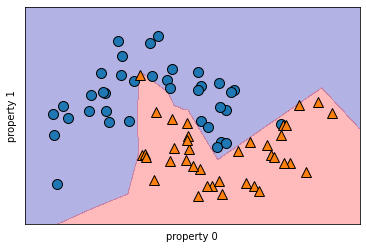

In [9]:
mglearn.plots.plot_2d_separator(mlp,x_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')
plt.show()

In [10]:
#활성화 함수 추가
mlp = MLPClassifier(solver='lbfgs',
                    activation='tanh',
                    random_state=0,
                    hidden_layer_sizes=[10,10]
                   )
mlp.fit(x_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=[10, 10], random_state=0,
              solver='lbfgs')

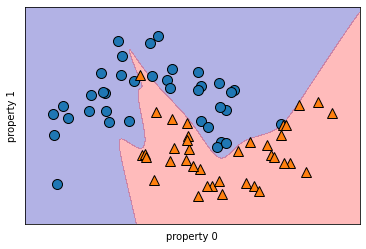

In [11]:
mglearn.plots.plot_2d_separator(mlp,x_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')
plt.show()

### 가중치
- MLP 신경망 모델에도 릿지 회귀에서처럼 L2패널티를 사용하여 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어할 수 있음

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


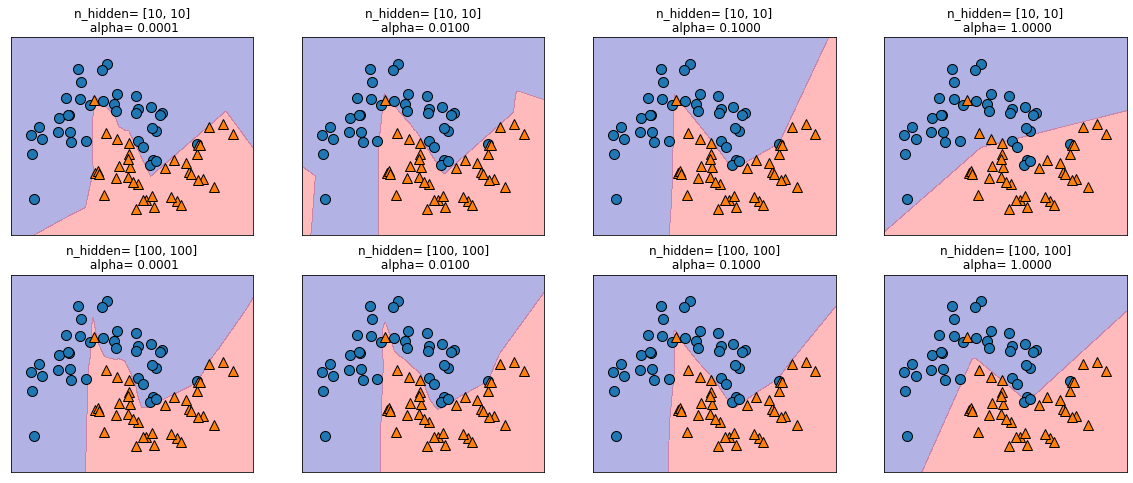

In [12]:
fig, axes= plt.subplots(2, 4, figsize= (20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp= MLPClassifier(solver= 'lbfgs',
                           random_state= 0,
                           hidden_layer_sizes= [n_hidden_nodes, n_hidden_nodes],
                           alpha= alpha).fit(x_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, x_train, fill= True, alpha= 0.3, ax=ax)
        mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden= [{}, {}]\n alpha= {:.4f}'.format(n_hidden_nodes,
                                                                 n_hidden_nodes,
                                                                 alpha))

### 초기 무작위 가중치

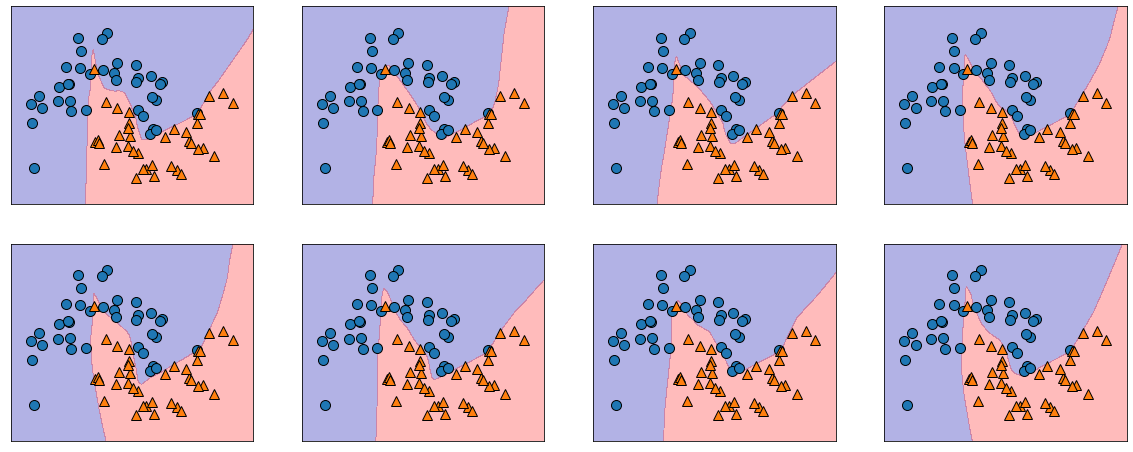

In [14]:
fig , axes = plt.subplots(2,4, figsize=(20,8))

for i ,ax in enumerate(axes.ravel()): #1차원 변환
    mlp=MLPClassifier(solver='lbfgs',random_state=i,
                     hidden_layer_sizes=[100,100])
    mlp.fit(x_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,x_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train,ax=ax)